Sod's shock tube:

Le problème que nous traitons ici possède une solution numérique précise pour les équations d'Euler.


Forme vectoriel des équations d'Euler:

\begin{equation}
\frac{\partial }{\partial t} \underline{\mathbf{u}} + \frac{\partial }{\partial x} \underline{\mathbf{f}} = 0
\end{equation}


Avec comme composantes:


\begin{equation}
\frac{\partial}{\partial t}
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]
+ \frac{\partial}{\partial x}
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right]
=0
\end{equation}

avec u composé de variables conservatives, et f représentant le flux.

la forme conservative des équations d'Euler est plus précise pour le problème que nous traitons ici.


In [7]:
# Importation des librairies requises :

%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16


Conditions initiales pour un tube de $x=-10m$ à $x=10m$ ayant une membrane rigide en $x=0$


$$\underline{IC}_L = \left[ \begin{array}{c}
\rho_L \\ u_L \\ p_L \\ \end{array}\right] = 
\left[ \begin{array}{c}
1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]$$

$$\underline{IC}_R = \left[ \begin{array}{c}
\rho_R \\ u_R \\ p_R \\ \end{array}\right] = 
\left[ \begin{array}{c}
0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]$$

In [8]:
# Déclaration des costantes :

nx = 81
dx = .25
dt = .0002   
gamma = 1.4
t=0.01
# Recherche du nombre d'itérations pour t
#et division de la longueur du tube en points espacés de dx :

nt=int(t/dt)+1  # nombre d'itérations pour le temps
print("Nombre d'itérations pour le temps:",nt)
x=numpy.linspace(-10,10,nx)
print("Les points définis sur le tube:",x)

# Déclaration des valeurs initiales pour les variables conservées:
#densité, vitesse et l'énergie spécifique total(exprimé en fct de la pression)

rho_L=1.
rho_R=0.125
u_L=0
u_R=0
p_L=10.**5
p_R=10.**4


Nombre d'itérations pour le temps: 51
Les points définis sur le tube: [-10.    -9.75  -9.5   -9.25  -9.    -8.75  -8.5   -8.25  -8.    -7.75
  -7.5   -7.25  -7.    -6.75  -6.5   -6.25  -6.    -5.75  -5.5   -5.25  -5.
  -4.75  -4.5   -4.25  -4.    -3.75  -3.5   -3.25  -3.    -2.75  -2.5
  -2.25  -2.    -1.75  -1.5   -1.25  -1.    -0.75  -0.5   -0.25   0.     0.25
   0.5    0.75   1.     1.25   1.5    1.75   2.     2.25   2.5    2.75   3.
   3.25   3.5    3.75   4.     4.25   4.5    4.75   5.     5.25   5.5
   5.75   6.     6.25   6.5    6.75   7.     7.25   7.5    7.75   8.     8.25
   8.5    8.75   9.     9.25   9.5    9.75  10.  ]


In [9]:
# Construction de tableaux de conditions initiales : sont des tableaux[1,81]

rho=rho_R*numpy.ones((nx),'float')
rho[:int((nx-1)*0.5)]=rho_L

u =u_R*numpy.ones((nx),'float')
u[:int((nx-1)*0.5)]=u_L

p=p_R*numpy.ones((nx),'float')
p[:int((nx-1)*0.5)]=p_L

Graphiques donnant les conditions initiales de part et d'autre de la membrane placée en x=0 m :

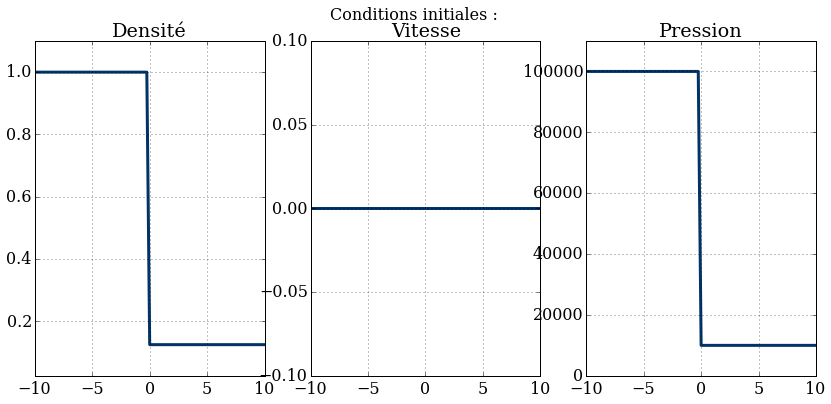

In [10]:
pyplot.rcParams['figure.figsize'] = 14, 6
fig, (ax0, ax1,ax2) = pyplot.subplots(ncols=3)
fig.suptitle('Conditions initiales :', fontsize=16)
ax0.grid(True)
ax0.plot(x, rho[:],color='#003366', ls='-', lw=3)
ax0.set_title('Densité')
ax0.set_ylim(min(rho)-0.1,max(rho)+0.1)
ax1.grid(True)
ax1.plot(x, u[:],color='#003366', ls='-', lw=3)
ax1.set_title('Vitesse')
ax1.set_ylim(min(u)-0.1,max(u)+0.1)
ax2.grid(True)
ax2.plot(x, p[:],color='#003366', ls='-', lw=3)
ax2.set_title('Pression')
ax2.set_ylim(min(p)-10000,max(p)+10000)
pyplot.show()


Le vecteur $\underline{\mathbf{u}}$ (variables conservées) de l'équation d'Euler est:


$$\underline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$

où: $\rho$ est la densité du fluide,
    $u$ est la vitesse du fluide,
    $e_T$ est l'énergie spécifique totale.
    
Ces 3 variables sont des variables conservées.
Nous exprimons $e_T$ en fonction de la pression(car c'est la pression qui est donnée).
les équations utilisées pour cela sont:

1)L'énergie spécifique totale: $$e_T = e + \frac{u^2}{2}$$
        
2)L'équation d'état pour un gaz idéal: $$e = e(\rho, p) = \frac{p}{(\gamma -1) \rho},$$
 
Ce qui nous donne:$$e_T = \frac{p}{(\gamma -1)\rho}+ \frac{1}{2}u^2$$
        
        

Donc on utilise pour le calcul du vecteur $\underline{\mathbf{u}}$ à t=0 qui correspondra à la première itération dans la méthode Richtmyer est:
\begin{equation}\underline{\mathbf{u}} = \left[ \begin{array}{c}
\rho \\
\rho u \\
\frac{p}{(\gamma -1)}+ \frac{u^2}{2} \rho\\ 
\end{array} \right]\end{equation}


In [1525]:
# Calcul du vecteur u à t=0:
u_v=numpy.zeros((3,nx))

u_v[0,:]=rho[:]
u_v[1,:]=rho[:]*u[:]
u_v[2,:]=(p[:]/(gamma-1)+0.5*rho[:]*(u[:]**2))


Graphiques des 3 composantes du vecteur $\underline{\mathbf{u}}$ à $t=0s$ :

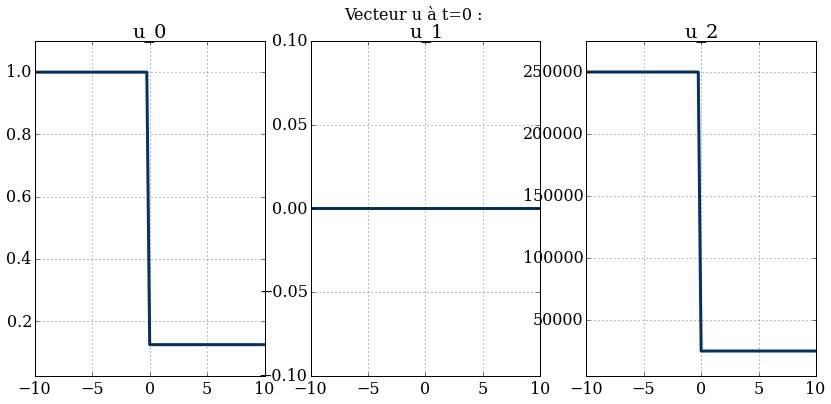

In [1526]:
pyplot.rcParams['figure.figsize'] = 14, 6
fig, (ax0, ax1,ax2) = pyplot.subplots(ncols=3)
fig.suptitle('Vecteur u à t=0 :', fontsize=16)
ax0.grid(True)
ax0.plot(x, u_v[0,:],color='#003366', ls='-', lw=3)
ax0.set_title('u_0')
ax0.set_ylim(min(u_v[0,:])-0.1,max(u_v[0,:])+0.1)
ax1.grid(True)
ax1.plot(x, u_v[1,:],color='#003366', ls='-', lw=3)
ax1.set_title('u_1')
ax1.set_ylim(min(u_v[1,:])-0.1,max(u_v[1,:])+0.1)
ax2.grid(True)
ax2.plot(x, u_v[2,:],color='#003366', ls='-', lw=3)
ax2.set_title('u_2')
ax2.set_ylim(min(u_v[2,:])-20000,max(u_v[2,:])+25000)
pyplot.show()

Flux : $\underline{\mathbf{f}}$ en fonction de $\underline{\mathbf{u}}$

$$\underline{\mathbf{f}} = f(\underline{\mathbf{u}})$$

$$\underline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$


In [1537]:
f= numpy.zeros((3,nx))
def calculF(u_v,gamma):
    f[0,:] = u_v[1,:]
    f[1,:] = (u_v[1,:]**2/u_v[0,:])+(gamma-1)*(u_v[2,:]-0.5*u_v[1,:]**2/u_v[0,:])
    f[2,:] = (u_v[2,:]+(gamma-1)*(u_v[2,:]-0.5*u_v[1,:]**2/u_v[0,:]))*u_v[1,:]/u_v[0,:]
    return f

Méthode Richtmyer:

L'étape 1:
La discrétisation est du type: "Forward time/Central space"

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right)
\end{align}

L'étape 2:
La discrétisation est du type: "Forward time/Backward space"
\begin{align}
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}

Le flux de la deuxième étape est calculé grâce à:


$$\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right).$$



In [ ]:
# Méthode Richtmyer : 
def Richtmyer(u_v,nt,nx,dx,dt):
    u_n =u_v.copy()
    u_n1=numpy.zeros((nt,3,nx))
    f_n=numpy.zeros((3,nx))
    time=0

    for t in range(1,nt):
    #step1 : création d'un tableau pour l'étape intermédiaire
        time=time+dt  
        f_n=calculF(u_v,gamma)
        u_n[:,0:-1]=0.5*(u_v[:,1:]+u_v[:,0:-1])-(dt/(2*dx))*(f_n[:,1:]-f_n[:,:-1])
       
    #step2 : 
        f_n=calculF(u_n,gamma)  
        u_n1[t,:,1:-1]=u_v[:,1:-1]-(dt/dx)*(f_n[:,1:-1]-f_n[:,0:-2])       
        u_n1[t,:,0] = u_v[:,1]  
        u_n1[t,:,-1] = u_v[:,-2]
        u_v=u_n1[t].copy()
        u_f=u_n1[t].copy()
        
    return u_f

Utilisation d'une fonction pour calculer les: densité, vitesse, pression pour la dernière itération ($t=0.01s$):
Nous faisons appel à la méthode Richtmyer.

In [1518]:
def CalculFinal(u_v):
    densite=numpy.zeros(nx)
    vitesse=numpy.zeros(nx)
    pression=numpy.zeros(nx)
    u_f=Richtmyer(u_v,nt,nx,dx,dt) #
    densite[:]=u_f[0,:]
    vitesse[:]=u_f[1,:]/u_f[0,:]
    pression[:]=(gamma - 1)*(u_f[2,:] - u_f[1,:]**2/(2.*u_f[0,:]))
    return densite, vitesse, pression


Calcul des 3 valeurs demandées en $x=2.5m$:

In [1535]:
for i in range(nx):
    if x[i]==2.5:
       
        print("Position de x=2.5 m dans l'itération spatiale (tube) est:",i)
      
        densite,vitesse,pression=CalculFinal(u_v)
        print("les valeurs données ci-dessous sont pour x=2.5 m :")
        print("La densité =",round(densite[i],2),"Kg/m^3")
        print("La vitesse =",round(vitesse[i],2),"m/s")
        print("La pression =",round(pression[i],2),"N/m^2")
        break
        


Position de x=2.5 m dans l'itération spatiale (tube) est: 50
les valeurs données ci-dessous sont pour x=2.5 m :
La densité = 0.37 Kg/m^3
La vitesse = 292.61 m/s
La pression = 30250.89 N/m^2


Graphiques des: densité, vitesse et pression calculées à $t=0.01s$ pour tous les points du tube:

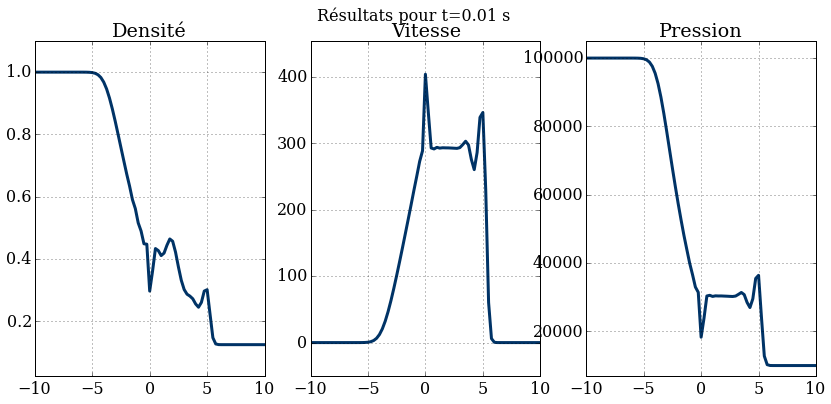

In [1520]:
pyplot.rcParams['figure.figsize'] = 14, 6
fig, (ax0, ax1,ax2) = pyplot.subplots(ncols=3)
fig.suptitle('Résultats pour t=0.01 s', fontsize=16)
ax0.grid(True)
ax0.plot(x, densite[:],color='#003366', ls='-', lw=3)
ax0.set_title('Densité')
ax0.set_ylim(min(densite)-0.1,max(densite)+0.1)
ax1.grid(True)
ax1.plot(x, vitesse[:],color='#003366', ls='-', lw=3)
ax1.set_title('Vitesse')
ax1.set_ylim(min(vitesse)-50,max(vitesse)+50)
ax2.grid(True)
ax2.plot(x, pression[:],color='#003366', ls='-', lw=3)
ax2.set_title('Pression')
ax2.set_ylim(min(pression)-3000,max(pression)+5000)
pyplot.show()
